In [5]:
#imported necesaary lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [6]:
start='2010-01-01'
end = '2023-12-31'
stock = 'AAPL'
data =  yf.download(stock , start ,end)

[*********************100%%**********************]  1 of 1 completed


In [8]:
data.reset_index(inplace=True)


In [9]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800
...,...,...,...,...,...,...,...
3517,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
3518,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
3519,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
3520,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900


In [10]:
ma_100_days = data.Close.rolling(100).mean()

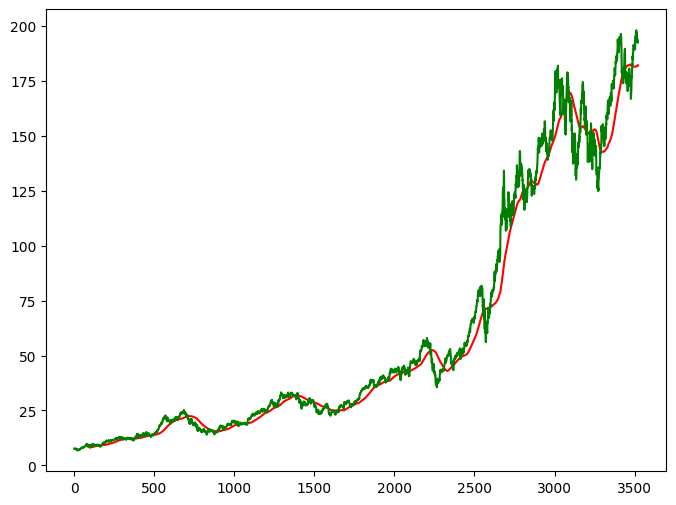

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close,'g')
plt.show()


In [12]:
ma_200_days= data.Close.rolling(200).mean()


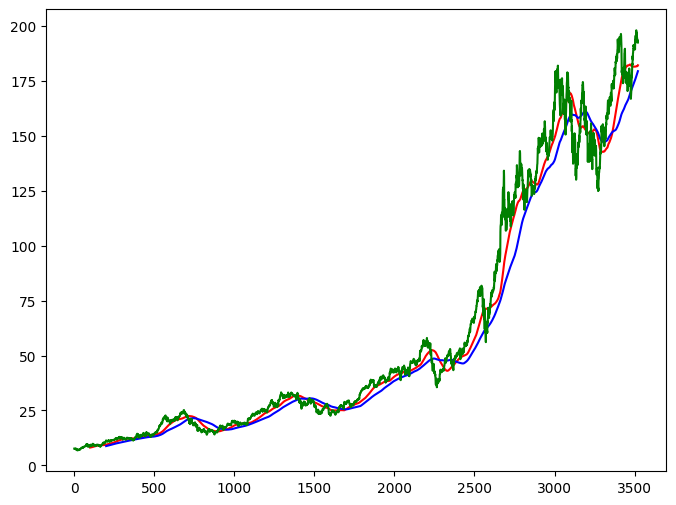

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close , 'g')
plt.show()


In [14]:
data.dropna(inplace=True)

In [19]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [20]:
data_train.shape[0]

2817

In [21]:
data_test.shape[0]

705

In [25]:
from sklearn.preprocessing import MinMaxScaler #fit our data into 0s and 1s
scaler=MinMaxScaler(feature_range=(0,1))

In [26]:
data_train_scale = scaler.fit_transform(data_train)

In [29]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
               x.append(data_train_scale[i-100:i])
               y.append(data_train_scale[i,0])

In [35]:
x,y = np.array(x), np.array(y)

In [38]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x.shape[1], x.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))


In [39]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [40]:
model.fit(x,y,epochs=50 , batch_size =32 , verbose=1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 24s 196ms/step - loss: 0.0262
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 175ms/step - loss: 0.0029
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - loss: 0.0032
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - loss: 0.0034
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - loss: 0.0022
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - loss: 0.0025
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - loss: 0.0020
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - loss: 0.0023
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - loss: 0.0019
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - loss: 0.0018
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - loss: 0.0018
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - loss: 0.0018
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 211ms/step - loss: 0.0017
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 238ms/step - loss: 0.0017
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 

In [41]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [42]:
pas_100_days= data_train.tail(100)

In [43]:
data_test = pd.concat([pas_100_days , data_test],ignore_index=True)

In [46]:
data_test_scale = scaler.fit_transform(data_test)


In [47]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
               x.append(data_test_scale[i-100:i])
               y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [48]:
y_predict = model.predict(x)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


array([89.34000397])

In [54]:
scale = 1/scaler.scale_
y_predict = y_predict*scale


In [55]:
y=y*scale

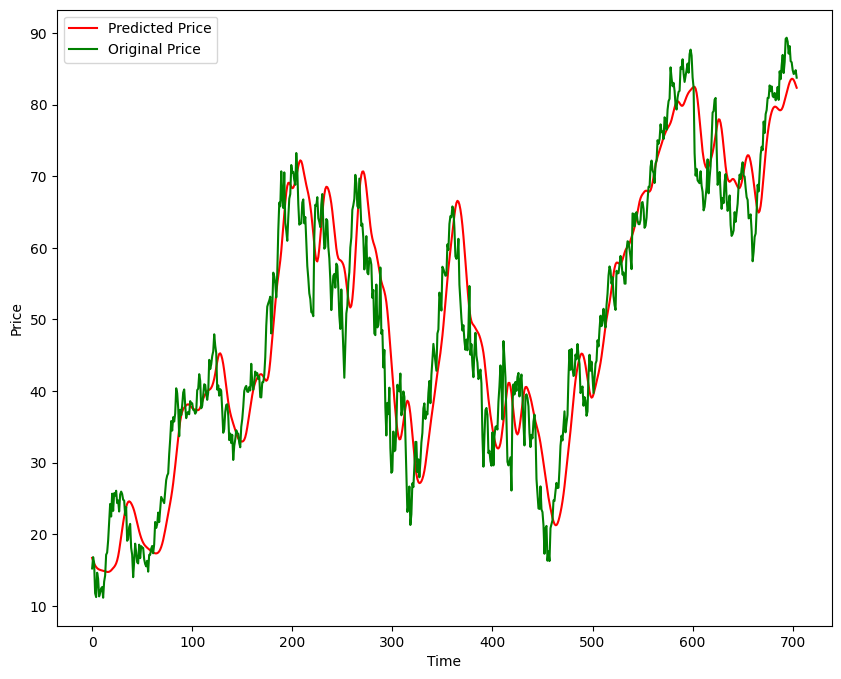

In [57]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' , label = 'Predicted Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
model.save('Stock Predictions Model.keras')